In [81]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
df=pd.read_csv(r"C:\Users\91706\Data Analytics Practice\databases\python\Job_Data_Analysis.csv")

In [83]:
#Data Cleaning
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [84]:
df_DA = df[df['job_title_short'] == 'Data Analyst']
df_DA.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,NaN,NaN,NaN,Engie,"[sql, php, excel, power bi, sap, jira]","{'analyst_tools': ['excel', 'power bi', 'sap']..."
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,NaN,NaN,NaN,Glovo,"[sql, python, r, redshift, pandas, excel, look...","{'analyst_tools': ['excel', 'looker', 'tableau..."
31,Data Analyst,Stage - Data Analyst F/H,"Paris, France",via LinkedIn,Full-time and Internship,False,France,2023-10-19 13:59:31,False,False,France,NaN,NaN,NaN,GROUPE BON MARCHÉ : Le Bon Marché Rive Gauche ...,[sql],{'programming': ['sql']}
34,Data Analyst,Data Analyst als Marketing Manager Automation ...,"Erlangen, Germany",via Central Illinois Proud Jobs,Full-time,False,Germany,2023-02-23 13:31:28,True,False,Germany,NaN,NaN,NaN,DEFACTO GmbH,[sap],{'analyst_tools': ['sap']}


In [85]:
df_plot=df_DA['job_country'].value_counts().head(10).to_frame()
df_plot

,count
job_country,
United States,67816
France,13803
United Kingdom,10482
Germany,7131
Singapore,6632
India,6121
Spain,5177
Philippines,4766
Italy,4543


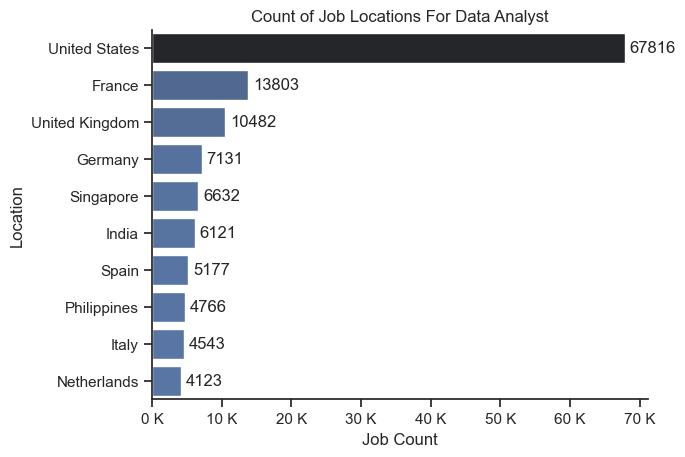

In [86]:
ax=sns.barplot(data=df_plot,x='count',y='job_country',hue='count',palette='dark:b_r',legend=False)
sns.set_theme(style='ticks')
plt.xlabel('Job Count')
plt.ylabel('Location')
plt.title('Count of Job Locations For Data Analyst')

ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'{int(x/1000)} K'))
for i,v in enumerate(df_plot['count']):
    ax.text(v+(max(df_plot['count'])*0.01), i, f'{v}',va='center',fontsize=12)

sns.despine()
plt.show()

In [87]:
df_DA.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,NaN,NaN,NaN,Engie,"[sql, php, excel, power bi, sap, jira]","{'analyst_tools': ['excel', 'power bi', 'sap']..."
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,NaN,NaN,NaN,Glovo,"[sql, python, r, redshift, pandas, excel, look...","{'analyst_tools': ['excel', 'looker', 'tableau..."
31,Data Analyst,Stage - Data Analyst F/H,"Paris, France",via LinkedIn,Full-time and Internship,False,France,2023-10-19 13:59:31,False,False,France,NaN,NaN,NaN,GROUPE BON MARCHÉ : Le Bon Marché Rive Gauche ...,[sql],{'programming': ['sql']}
34,Data Analyst,Data Analyst als Marketing Manager Automation ...,"Erlangen, Germany",via Central Illinois Proud Jobs,Full-time,False,Germany,2023-02-23 13:31:28,True,False,Germany,NaN,NaN,NaN,DEFACTO GmbH,[sap],{'analyst_tools': ['sap']}


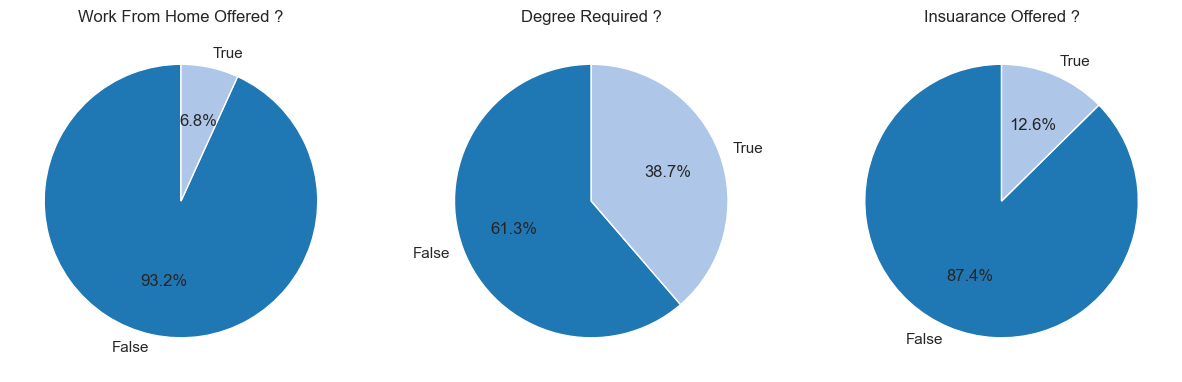

In [88]:
dict_column={
    'job_work_from_home':'Work From Home Offered ?',
    'job_no_degree_mention':'Degree Required ?',
    'job_health_insurance':'Insuarance Offered ?'
}

fig,ax=plt.subplots(1,3)
fig.set_size_inches((15,5))

for i,(column,title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA[column].value_counts(),labels = ['False','True'], autopct='%1.1f%%',startangle=90,colors=plt.cm.tab20.colors)
    ax[i].set_title(title)

plt.show()

In [89]:
df_plot1=df_DA['company_name'].value_counts().head(10).to_frame()
df_plot1

,count
company_name,
Emprego,1118
Robert Half,1046
Insight Global,892
Citi,863
Dice,600
UnitedHealth Group,592
Confidenziale,550
Get It Recruit - Information Technology,514
Randstad,465


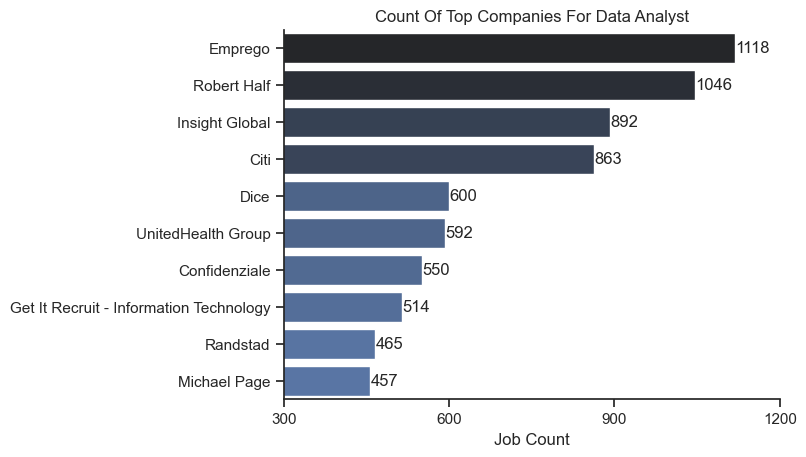

In [96]:
ax=sns.barplot(data=df_plot1,x='count',y='company_name',hue='count',palette='dark:b_r',legend=False)
sns.set_theme(style='ticks')
plt.xlabel('Job Count')
plt.ylabel('')
plt.title('Count Of Top Companies For Data Analyst')
for i,v in enumerate(df_plot1['count']):
    ax.text(v+1,i,f'{v}',va='center' , fontsize=12)

plt.xlim(300,1200)
plt.xticks([300, 600, 900 ,1200])
sns.despine()
plt.show()

In [91]:
plot2 = df_DA['job_via'].value_counts().head().to_frame(name='count')
plot2

,count
job_via,
via LinkedIn,41778
via BeBee,25778
via Trabajo.org,15489
via Indeed,12942
via Recruit.net,5951


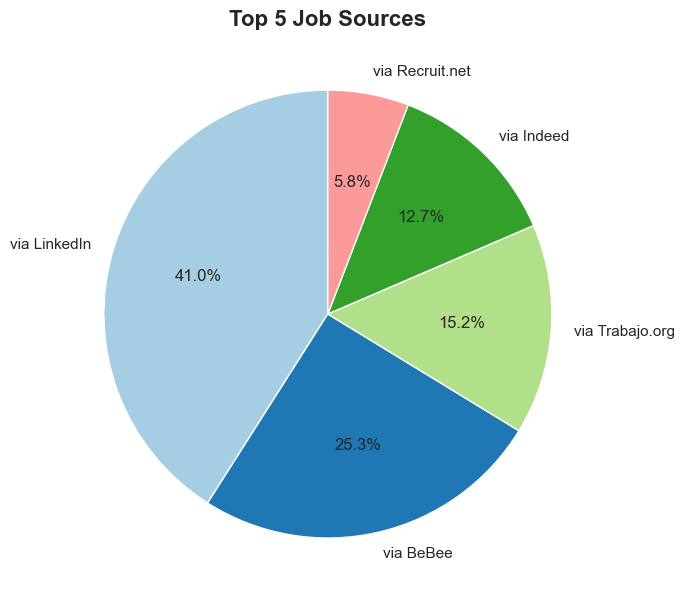

In [92]:
plt.figure(figsize=(7, 7))
plt.pie(
    plot2['count'],
    labels=plot2.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'white'},
    colors=plt.cm.Paired.colors  )

plt.title('Top 5 Job Sources', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()